In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
url ='https://fantasy.premierleague.com/api/bootstrap-static/'

In [3]:
r = requests.get(url)

In [4]:
json = r.json()

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(json['elements']) #Creating data frame for element
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [7]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,58822,0,0,-3,3,0,2,0.5,...,389,151,460,180,NaN,,NaN,,NaN,
1,NaN,NaN,84450,0,0,0,0,1,3,3.5,...,65,43,36,27,NaN,,3.0,,NaN,
2,0.0,0.0,153256,0,0,-2,2,1,3,0.0,...,401,159,359,161,NaN,,NaN,,NaN,
3,NaN,NaN,156074,0,0,-2,2,0,2,1.0,...,404,163,378,137,NaN,,NaN,,NaN,
4,0.0,0.0,167199,0,0,-2,2,0,3,0.0,...,135,76,230,108,NaN,,NaN,,NaN,


In [8]:
elements_df.columns.sort_values()

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [9]:
slim_elements_df = elements_df[['first_name','second_name','team', 'element_type','selected_by_percent', 'now_cost','minutes','threat', 'value_season','now_cost','total_points']]

In [10]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points
0,Cédric,Alves Soares,1,2,0.2,42,0,0.0,0.0,42,0
1,Granit,Xhaka,1,3,2.9,50,537,102.0,5.2,50,26
2,Mohamed,Elneny,1,3,0.8,43,90,0.0,0.5,43,2
3,Rob,Holding,1,2,0.1,43,3,0.0,0.5,43,2
4,Thomas,Partey,1,3,0.3,48,270,49.0,1.7,48,8


In [11]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_13565/2072665155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'


In [12]:
slim_elements_df.head()


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position
0,Cédric,Alves Soares,1,2,0.2,42,0,0.0,0.0,42,0,Defender
1,Granit,Xhaka,1,3,2.9,50,537,102.0,5.2,50,26,Midfielder
2,Mohamed,Elneny,1,3,0.8,43,90,0.0,0.5,43,2,Midfielder
3,Rob,Holding,1,2,0.1,43,3,0.0,0.5,43,2,Defender
4,Thomas,Partey,1,3,0.3,48,270,49.0,1.7,48,8,Midfielder


In [13]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_13565/1835604597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map


In [14]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_13565/274112818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float


In [15]:
slim_elements_df.head()


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
0,Cédric,Alves Soares,Arsenal,2,0.2,42,0,0.0,0.0,42,0,Defender,0.0
1,Granit,Xhaka,Arsenal,3,2.9,50,537,102.0,5.2,50,26,Midfielder,5.2
2,Mohamed,Elneny,Arsenal,3,0.8,43,90,0.0,0.5,43,2,Midfielder,0.5
3,Rob,Holding,Arsenal,2,0.1,43,3,0.0,0.5,43,2,Defender,0.5
4,Thomas,Partey,Arsenal,3,0.3,48,270,49.0,1.7,48,8,Midfielder,1.7


In [16]:
slim_elements_df.sort_values('value', ascending = False).head(10)  #Displays 10 columns and sets sort order using the 'value' column

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
464,Nick,Pope,Newcastle,1,12.9,51,540,0.0,7.1,51,36,Goalkeeper,7.1
132,Alexis,Mac Allister,Brighton,3,5.9,56,540,85.0,7.0,56,39,Midfielder,7.0
599,José,Malheiro de Sá,Wolves,1,5.5,50,540,0.0,7.0,50,35,Goalkeeper,7.0
123,Pascal,Groß,Brighton,3,27.0,60,540,159.0,7.0,60,42,Midfielder,7.0
489,Dean,Henderson,Nott'm Forest,1,13.4,47,540,0.0,6.6,47,31,Goalkeeper,6.6
615,Nathan,Collins,Wolves,2,1.4,45,540,6.0,6.2,45,28,Defender,6.2
91,Ivan,Toney,Brentford,4,19.6,72,540,171.0,6.2,72,45,Forward,6.2
415,Marcus,Rashford,Man Utd,3,17.8,66,520,211.0,6.1,66,40,Midfielder,6.1
314,Rodrigo,Moreno,Leeds,3,6.9,63,357,267.0,6.0,63,38,Midfielder,6.0
23,William,Saliba,Arsenal,2,21.4,48,540,23.0,6.0,48,29,Defender,6.0


In [17]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc = np.mean).reset_index()  #Creates a pivot table 

pivot.sort_values('value', ascending= False)

,position,value
3,Midfielder,1.454074
2,Goalkeeper,1.429032
0,Defender,1.428700
1,Forward,1.387143


In [18]:
pivot = slim_elements_df.pivot_table(index = 'team', values = 'value', aggfunc = np.mean).reset_index()

pivot.sort_values('value', ascending = False)

,team,value
4,Brighton,2.046667
0,Arsenal,2.003571
14,Newcastle,1.866667
3,Brentford,1.793548
19,Wolves,1.785714
12,Man City,1.743333
17,Spurs,1.487879
9,Leeds,1.396875
2,Bournemouth,1.389655
11,Liverpool,1.352941


Text(0.5, 1.0, 'Goalkeeper')

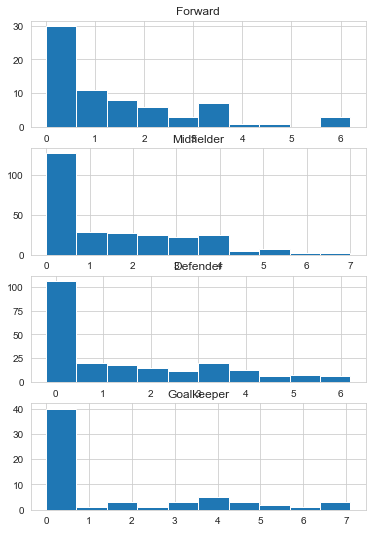

In [19]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

sns.set_style('whitegrid')
fig, ax = plt.subplots(4,1, figsize = (6,9))

ax[0].hist(fwd_df.value)
ax[0].set_title("Forward")

ax[1].hist(mid_df.value)
ax[1].set_title("Midfielder")

ax[2].hist(def_df.value)
ax[2].set_title("Defender")

ax[3].hist(goal_df.value)
ax[3].set_title("Goalkeeper")


In [20]:
sort_mid_value = mid_df.sort_values('value_season', ascending = False)

sort_mid_value.head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
123,Pascal,Groß,Brighton,3,27.0,60,540,159.0,7.0,60,42,Midfielder,7.0
132,Alexis,Mac Allister,Brighton,3,5.9,56,540,85.0,7.0,56,39,Midfielder,7.0
415,Marcus,Rashford,Man Utd,3,17.8,66,520,211.0,6.1,66,40,Midfielder,6.1
314,Rodrigo,Moreno,Leeds,3,6.9,63,357,267.0,6.0,63,38,Midfielder,6.0
17,Gabriel,Martinelli Silva,Arsenal,3,46.7,65,524,307.0,5.5,65,36,Midfielder,5.5
1,Granit,Xhaka,Arsenal,3,2.9,50,537,102.0,5.2,50,26,Midfielder,5.2
5,Martin,Ødegaard,Arsenal,3,16.5,65,496,174.0,5.2,65,34,Midfielder,5.2
544,Pierre-Emile,Højbjerg,Spurs,3,2.0,55,540,46.0,5.1,55,28,Midfielder,5.1
271,Andreas,Hoelgebaum Pereira,Fulham,3,25.0,46,478,55.0,5.0,46,23,Midfielder,5.0
128,Leandro,Trossard,Brighton,3,3.9,65,494,216.0,4.9,65,32,Midfielder,4.9


In [21]:
goal_df.head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,threat,value_season,now_cost,total_points,position,value
13,Aaron,Ramsdale,Arsenal,1,11.1,49,540,0.0,3.9,49,19,Goalkeeper,3.9
21,Matt,Turner,Arsenal,1,1.4,39,0,0.0,0.0,39,0,Goalkeeper,0.0
30,Emiliano,Martínez Romero,Aston Villa,1,4.6,49,540,0.0,4.5,49,22,Goalkeeper,4.5
34,Robin,Olsen,Aston Villa,1,1.7,40,0,0.0,0.0,40,0,Goalkeeper,0.0
75,Mark,Travers,Bournemouth,1,0.4,45,360,0.0,1.8,45,8,Goalkeeper,1.8
80,Will,Dennis,Bournemouth,1,0.6,40,0,0.0,0.0,40,0,Goalkeeper,0.0
85,Norberto,Murara Neto,Bournemouth,1,0.1,45,180,0.0,1.3,45,6,Goalkeeper,1.3
92,David,Raya Martin,Brentford,1,6.6,45,540,0.0,5.1,45,23,Goalkeeper,5.1
111,Ellery,Balcombe,Brentford,1,0.1,40,0,0.0,0.0,40,0,Goalkeeper,0.0
114,Thomas,Strakosha,Brentford,1,0.2,44,0,0.0,0.0,44,0,Goalkeeper,0.0


In [22]:
slim_elements_df.to_csv('GW1-2.csv')